다음 데이터 세트를 이용하여 다이아몬드 가격예측(회귀)

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" diamonds = pd.read_csv(url)

ML (RF, DT, LR) 수행

Dense layer만 이용 FNCC 구현

순환 데이터 변환후 CNN 구현

각 단계별로 수행완료후

검사받은 이후에 다음 단계 진행

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

diamonds = pd.read_csv( "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv")
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
df = diamonds

In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['cut'] = label_encoder.fit_transform(df['cut']) # label encoding

In [5]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['color'] = label_encoder.fit_transform(df['color']) # label encoding

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['clarity'] = label_encoder.fit_transform(df['clarity']) # label encoding

In [7]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [8]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
#레이블 개수 확인 (숫자)
df['cut'].value_counts()

2    21551
3    13791
4    12082
1     4906
0     1610
Name: cut, dtype: int64

In [10]:
#결측치 확인
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
#outcome만 제거하고 x를 만든다
X=df.drop('price',axis=1)
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


In [12]:
#레이블만 남겨둔다.
y=df['price']
y.value_counts()

605      132
802      127
625      126
828      125
776      124
        ... 
8816       1
14704      1
14699      1
14698      1
9793       1
Name: price, Length: 11602, dtype: int64

In [13]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Normalize the data (CNN and LSTM models often perform better with normalized data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:

def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        end_ix = i + n_steps
        if end_ix > len(sequences):
            break
        # 입력 시퀀스는 마지막 열을 제외한 값
        seq_x = sequences[i:end_ix, :-1]
        # 출력 y는 마지막 열의 평균값
        seq_y = np.mean(sequences[i:end_ix, -1])
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [16]:
train_set = np.c_[X_train, y_train]
test_set = np.c_[X_test, y_test]

X_train, y_train = split_sequences(train_set, 5)
print(X_train.shape, y_train.shape)

X_test, y_test = split_sequences(test_set, 5)
print(X_test.shape, y_test.shape)   

(43148, 5, 9) (43148,)
(10784, 5, 9) (10784,)


In [17]:
# 입력 데이터를 (샘플 수, 타임스텝 수, 1) 형태로 변환
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [18]:
from tensorflow.keras import layers, models

# Define the CNN model for regression
model = models.Sequential()

# Add 1D Convolutional layers
model.add(layers.Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_test_scaled.shape[1], 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(32, kernel_size=2, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output and add Dense layers for regression
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display the model summary
model.summary()

C:\ProgramData\Anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 8, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 3, 32)               │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,545 (33.38 KB)

 Trainable params: 8,545 (33.38 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# 데이터 크기 확인
print("X_train_scaled shape:", X_train_scaled.shape)
print("y_train shape:", y_train.shape)

# 크기 맞추기 (더 작은 크기에 맞춰 자르기)
min_samples = min(X_train_scaled.shape[0], y_train.shape[0])
X_train_scaled = X_train_scaled[:min_samples]
y_train = y_train[:min_samples]

X_train_scaled shape: (43152, 9, 1)
y_train shape: (43148,)


In [20]:
# 작은 크기인 832에 맞춰 테스트 데이터 정리
min_test_samples = min(X_test_scaled.shape[0], y_test.shape[0])
X_test_scaled = X_test_scaled[:min_test_samples]
y_test = y_test[:min_test_samples]

In [21]:
history = model.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 7636644.5000 - mae: 2159.0425 - val_loss: 3138547.0000 - val_mae: 1420.9125
Epoch 2/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 2993536.2500 - mae: 1377.0525 - val_loss: 3009200.7500 - val_mae: 1383.1772
Epoch 3/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 2905432.7500 - mae: 1361.2792 - val_loss: 2963317.2500 - val_mae: 1370.9508
Epoch 4/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 2854668.5000 - mae: 1347.0829 - val_loss: 2918109.7500 - val_mae: 1364.7750
Epoch 5/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 2851280.7500 - mae: 1348.3591 - val_loss: 2902630.5000 - val_mae: 1348.0947
Epoch 6/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 2804001.7500 - mae: 1338.5497 - val_loss: 2841510.0000 - val_mae: 1355.3772
Epoch 7/30
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: 2774256.5000 - mae: 1335.7448 - val_loss: 2829874.0000 - val_mae: 1337.1813
Epoch 8/30
1349/1349 ━━━━━━━

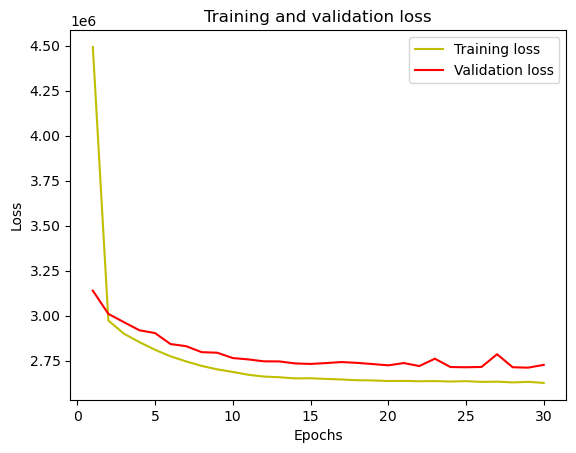

In [22]:
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()